Wcbreast_wdbc dataset

In [1]:
import pandas as pd
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv",
    na_values = ['NA','?'])
pd.set_option('display.max_columns',5)
pd.set_option('display.max_rows',5)

display(df)

,id,diagnosis,...,worst_symmetry,worst_fractal_dimension
0,842302,M,...,0.4601,0.11890
1,842517,M,...,0.2750,0.08902
...,...,...,...,...,...
567,927241,M,...,0.4087,0.12400
568,92751,B,...,0.2871,0.07039


Binary classification is common in medical testing.  Often you want to diagnose if someone has a disease.  This can lead to two types of errors, know as false positives and false negatives:

* **False Positive** - Your test (neural network) indicated that the patient had the disease; however, the patient did not have the disease.
* **False Negative** - Your test (neural network) indicated that the patient did not have the disease; however, the patient did have the disease.
* **True Positive** - Your test (neural network) correctly identified that the patient had the disease.
* **True Negative** - Your test (neural network) correctly identified that the patient did not have the disease.

Types of errors can be seen in Figure 4.ETYP. 

**Figure 4.ETYP: Type of Error**
![Type of Error](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_4_errors.png "Type of Error")

Neural networks classify in terms of probability of it being positive. However, at what probability do you give a positive result?  Is the cutoff 50%? 90%?  Where you set this cutoff is called the threshold.  Anything above the cutoff is positive, anything below is negative.  Setting this cutoff allows the model to be more sensitive or specific:

More info on Sensitivity vs Specificity: [Khan Academy](https://www.youtube.com/watch?v=Z5TtopYX1Gc)

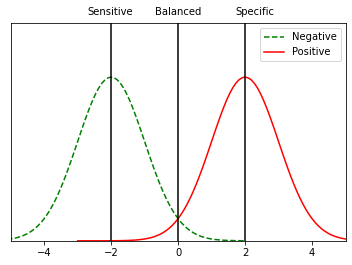

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu1 = -2
mu2 = 2
variance = 1
sigma = math.sqrt(variance)
x1 = np.linspace(mu1 - 5*sigma, mu1 + 4*sigma, 100)
x2 = np.linspace(mu2 - 5*sigma, mu2 + 4*sigma, 100)
plt.plot(x1, stats.norm.pdf(x1, mu1, sigma)/1, color='green', linestyle='dashed')
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma)/1, color='red')
plt.axvline(x=-2, color='black')
plt.axvline(x=0, color='black')
plt.axvline(x=2, color='black')
plt.text(-2.7,0.55,"Sensitive")
plt.text(-0.7,0.55,"Balanced")
plt.text(1.7,0.55,"Specific")
plt.ylim([0,0.53])
plt.xlim([-5,5])
plt.legend(['Negative','Positive'])
plt.yticks([])
plt.show()

In [3]:
from scipy.stats import zscore
display(df)
x_columns = df.columns.drop('diagnosis').drop('id')
x_columns
for col in x_columns:
    df[col] = zscore(df[col])
#convert to numpy--Regression
x=df[x_columns].values
y=df['diagnosis'].map({'M':1,'B':0}) # binary classification
#for understanding map visit this link : https://book.pythontips.com/en/latest/map_filter.html

,id,diagnosis,...,worst_symmetry,worst_fractal_dimension
0,842302,M,...,0.4601,0.11890
1,842517,M,...,0.2750,0.08902
...,...,...,...,...,...
567,927241,M,...,0.4087,0.12400
568,92751,B,...,0.2871,0.07039


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

#we use the confusion matrix
def plot_confusion_matrix(cm,name,title='Confusion Matrix',cmap=plt.cm.Blues):
   # where cm is the confusion matrix 
   # name are the name of classes
    plt.imshow(cm,interpolation = 'nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks,names,rotation=45)
    plt.yticks(tick_marks,names)
    plt.tight_layout()
    plt.xlabel("Predicted Labels")
    ply.ylabel("True Labels")

# Plot an ROC. pred - the predict
# ions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    


## ROC chart

In [5]:
# Classification neural network
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu',
                kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
model.compile(loss='binary_crossentropy', 
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
    patience=5, verbose=1, mode='auto', restore_best_weights=True)

model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
14/14 - 0s - loss: 0.6833 - accuracy: 0.8592 - val_loss: 0.6601 - val_accuracy: 0.9580
Epoch 2/1000
14/14 - 0s - loss: 0.6098 - accuracy: 0.9343 - val_loss: 0.5098 - val_accuracy: 0.9580
Epoch 3/1000
14/14 - 0s - loss: 0.3906 - accuracy: 0.9413 - val_loss: 0.2137 - val_accuracy: 0.9650
Epoch 4/1000
14/14 - 0s - loss: 0.1782 - accuracy: 0.9484 - val_loss: 0.0911 - val_accuracy: 0.9650
Epoch 5/1000
14/14 - 0s - loss: 0.1056 - accuracy: 0.9695 - val_loss: 0.0645 - val_accuracy: 0.9790
Epoch 6/1000
14/14 - 0s - loss: 0.0821 - accuracy: 0.9742 - val_loss: 0.0542 - val_accuracy: 0.9930
Epoch 7/1000
14/14 - 0s - loss: 0.0713 - accuracy: 0.9789 - val_loss: 0.0503 - val_accuracy: 0.9930
Epoch 8/1000
14/14 - 0s - loss: 0.0646 - accuracy: 0.9789 - val_loss: 0.0532 - val_accuracy: 0.9860
Epoch 9/1000
14/14 - 0s - loss: 0.0580 - accuracy: 0.9836 - val_loss: 0.0490 - val_accuracy: 0.9860
Epoch 10/1000
14/14 - 0s - loss: 0.0575 - accuracy: 0.9789 - val_loss: 0.0578 - val_accuracy: 0.9860

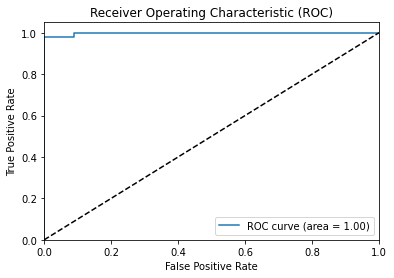

In [6]:
pred = model.predict(x_test)
plot_roc(pred,y_test)

# Multiclass Classificatoin Error Metrics

If you want to predict more than one outcome, you will need more than one output neuron. Because a single neuron can predict two outcomes, a neural network with two output neurons is somewhat rare. If there are three or more outcomes, there will be three or more output neurons. The following sections will examine several metrics for evaluating classification error. The following classification neural network will be used to evaluate.

In [7]:
import pandas as pd
from scipy.stats import zscore

df = pd.read_csv(
        "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
        na_values = ['NA','?'])
display(df)
df.info()

,id,job,...,crime,product
0,1,vv,...,0.071100,b
1,2,kd,...,0.400809,c
...,...,...,...,...,...
1998,1999,qp,...,0.117803,c
1999,2000,pe,...,0.451973,c


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2000 non-null   int64  
 1   job             2000 non-null   object 
 2   area            2000 non-null   object 
 3   income          1941 non-null   float64
 4   aspect          2000 non-null   float64
 5   subscriptions   2000 non-null   int64  
 6   dist_healthy    2000 non-null   float64
 7   save_rate       2000 non-null   int64  
 8   dist_unhealthy  2000 non-null   float64
 9   age             2000 non-null   int64  
 10  pop_dense       2000 non-null   float64
 11  retail_dense    2000 non-null   float64
 12  crime           2000 non-null   float64
 13  product         2000 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 218.9+ KB


here lets create the dummy value for jobs and area  since there can be more fields related to them

In [8]:
df = pd.concat([df,pd.get_dummies(df['job'], prefix = "job")], axis = 1)
df.drop('job', axis = 1, inplace = True)

df = pd.concat([df,pd.get_dummies(df['area'], prefix = "area")], axis = 1)
df.drop('area', axis = 1, inplace = True)

med = df['income'].median()
df['income'] = df['income'].fillna(med)

#finding individual zscore for each

df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['subscriptions'] = zscore(df['subscriptions'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])

#convert to numpy classifications

x_columns = df.columns.drop('product').drop('id')
x = df[x_columns].values
dummies = pd.get_dummies(df['product'])
products = dummies.columns
y = dummies.values

In [9]:
# Classification neural network
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu',
                kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(y.shape[1],activation='softmax',
                kernel_initializer='random_normal'))
model.compile(loss='categorical_crossentropy', 
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)


Epoch 1/1000
47/47 - 0s - loss: 1.5371 - accuracy: 0.4113 - val_loss: 1.1449 - val_accuracy: 0.4980
Epoch 2/1000
47/47 - 0s - loss: 1.1473 - accuracy: 0.4773 - val_loss: 1.0951 - val_accuracy: 0.4980
Epoch 3/1000
47/47 - 0s - loss: 1.1036 - accuracy: 0.4820 - val_loss: 1.0557 - val_accuracy: 0.5040
Epoch 4/1000
47/47 - 0s - loss: 0.9894 - accuracy: 0.5760 - val_loss: 0.9440 - val_accuracy: 0.5940
Epoch 5/1000
47/47 - 0s - loss: 0.8538 - accuracy: 0.6553 - val_loss: 0.8532 - val_accuracy: 0.6480
Epoch 6/1000
47/47 - 0s - loss: 0.8053 - accuracy: 0.6680 - val_loss: 0.8188 - val_accuracy: 0.6620
Epoch 7/1000
47/47 - 0s - loss: 0.7710 - accuracy: 0.6927 - val_loss: 0.8085 - val_accuracy: 0.6920
Epoch 8/1000
47/47 - 0s - loss: 0.7584 - accuracy: 0.6953 - val_loss: 0.7914 - val_accuracy: 0.6940
Epoch 9/1000
47/47 - 0s - loss: 0.7422 - accuracy: 0.6960 - val_loss: 0.7936 - val_accuracy: 0.6680
Epoch 10/1000
47/47 - 0s - loss: 0.7324 - accuracy: 0.6867 - val_loss: 0.7794 - val_accuracy: 0.6740

### Calculate Classification Accuracy
 
Accuracy is the number of rows where the neural network correctly predicted the target class.  Accuracy is only used for classification, not regression.

$$ accuracy = \frac{c}{N} $$

Where $c$ is the number correct and $N$ is the size of the evaluated set (training or validation). Higher accuracy numbers are desired.

As we just saw, by default, Keras will return the percent probability for each class. We can change these prediction probabilities into the actual iris predicted with **argmax**.

In [10]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

In [11]:
# now calculating the accuracy how it is correctly classified
from sklearn import metrics

y_compare = np.argmax(y_test, axis=1)
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy Score : {}".format(score))

Accuracy Score : 0.706


calculate classification log loss

In [16]:
from IPython.display import display

#dont display numpy in scientific notations

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

pred = model.predict(x_test)

print("Number of Predictions : ")
display(pred[0:5])

print("Percent Probability : ")
display(pred[0]*100)

score = metrics.log_loss(y_test, pred)
print("Log Loss Score : {}".format(score))

Number of Predictions : 


array([[0.    , 0.0921, 0.7483, 0.1594, 0.0002, 0.    , 0.    ],
       [0.    , 0.6668, 0.3325, 0.    , 0.0007, 0.    , 0.    ],
       [0.0001, 0.6734, 0.3244, 0.0001, 0.0019, 0.0001, 0.    ],
       [0.    , 0.2837, 0.7084, 0.0073, 0.0006, 0.    , 0.    ],
       [0.    , 0.0611, 0.827 , 0.1119, 0.    , 0.    , 0.    ]],
      dtype=float32)

Percent Probability : 


array([ 0.0009,  9.2081, 74.8325, 15.9386,  0.0192,  0.0005,  0.0001],
      dtype=float32)

Log Loss Score : 0.7262278663143515


[Log loss](https://www.kaggle.com/wiki/LogarithmicLoss) is calculated as follows:

Log Loss is used in Logistic Regression

$$ \mbox{log loss} = -\frac{1}{N}\sum_{i=1}^N {( {y}_i\log(\hat{y}_i) + (1 - {y}_i)\log(1 - \hat{y}_i))} $$


You should use this equation only as an objective function for classifications that have two outcomes. The variable y-hat is the neural network’s prediction, and the variable y is the known correct answer.  In this case, y will always be 0 or 1.  The training data have no probabilities. The neural network classifies it either into one class (1) or the other (0).  

The variable N represents the number of elements in the training set the number of questions in the test.  We divide by N because this process is customary for an average.  We also begin the equation with a negative because the log function is always negative over the domain 0 to 1.  This negation allows a positive score for the training to minimize.

You will notice two terms are separated by the addition (+).  Each contains a log function.  Because y will be either 0 or 1, then one of these two terms will cancel out to 0.  If y is 0, then the first term will reduce to 0.  If y is 1, then the second term will be 0.  

If your prediction for the first class of a two-class prediction is y-hat, then your prediction for the second class is 1 minus y-hat.  Essentially, if your prediction for class A is 70% (0.7), then your prediction for class B is 30% (0.3).  Your score will increase by the log of your prediction for the correct class.  If the neural network had predicted 1.0 for class A, and the correct answer was A, your score would increase by log (1), which is 0. For log loss, we seek a low score, so a correct answer results in 0.  Some of these log values for a neural network's probability estimate for the correct class:

* -log(1.0) = 0
* -log(0.95) = 0.02
* -log(0.9) = 0.05
* -log(0.8) = 0.1
* -log(0.5) = 0.3
* -log(0.1) = 1
* -log(0.01) = 2
* -log(1.0e-12) = 12
* -log(0.0) = negative infinity

As you can see, giving a low confidence to the correct answer affects the score the most.  Because log (0) is negative infinity, we typically impose a minimum value.  Of course, the above log values are for a single training set element.  We will average the log values for the entire training set.

The log function is useful to penalizing wrong answers.  The following code demonstrates the utility of the log function:

C:\Users\KUSHAL~1\AppData\Local\Temp/ipykernel_7004/2973668174.py:8: RuntimeWarning: divide by zero encountered in log
  ax1.plot(t, np.log(t))


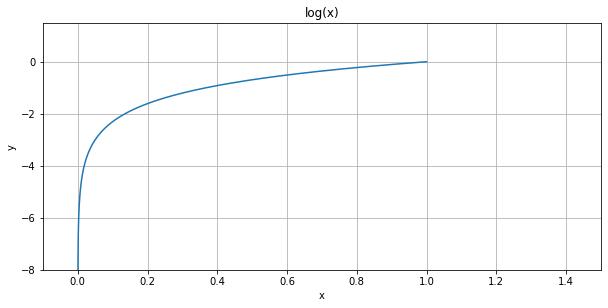

In [36]:
%matplotlib inline
from matplotlib.pyplot import figure , show
from numpy import arange, sin, pi
t = arange(0.0, 1.0, 0.00001)

fig = figure(1,figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.plot(t, np.log(t))
ax1.grid(True)
ax1.set_ylim((-8, 1.5))
ax1.set_xlim((-0.1,1.5))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('log(x)')

show()